# Menu <a class="anchor" id="menu"></a>
   
* [1. Préparation du jeu de données](#init)
    * [1.1 Séparation du jeu de données en `train`, `valid` et `test` sets](#NLP_split)
    * [1.2 Création du Corpus Bag-Of-Words](#NLP_corpus_bow)
    * [1.3 Création du Corpus TF-IDF](#NLP_corpus_tfidf)
* [2. Recherche du `modèle` de classification le plus adapté](#CLF)
    * [2.1 DummyClassifier](#CLF_dummy)
    * [2.2 LogisticRegression](#CLF_logreg)
* [3. Recherche du `pré-traitement` le plus adapté](#PREPROCESS)
    * [3.1 RAW / Aucun traitement](#PREPROCESS_raw)
    * [3.2 Preprocessing 01 / Twitter-Preprocessor](#PREPROCESS_01)
    * [3.3 Preprocessing 02 / SpaCy Tokenization](#PREPROCESS_02)
    * [3.4 Preprocessing 03 / SpaCy Filtering](#PREPROCESS_03)
    * [3.5 Preprocessing 04 / SpaCy Lemmatization](#PREPROCESS_04)
    * [3.6 Comparaison des scores](#PREPROCESS_scores)

In [1]:
import time
import pathlib
import pandas as pd
import numpy as np

import joblib

random_seed = 0
np.random.seed(random_seed)

---
---
# 1. Préparation du jeu de données <a class="anchor" id="init"></a> [⇪](#menu)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder

def preprocess_data(data_nlp, col_name='lemmas', test_size=0.2):
    
    # Target encoding (NOT required anymore with the prepared dataset)
    # label_encoder = LabelEncoder()
    # targets = label_encoder.fit_transform(data_nlp.target)

    # Split the dataset
    df_train, df_test, y_train, y_test = train_test_split(data_nlp[col_name], data_nlp.target, test_size=test_size, random_state=random_seed)
    print(f"DataFrames shapes >> df_train: {df_train.shape}, df_test:{df_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")
    print(f"Preview:\n{df_train[:2]}")

    # Prepare corpus for train & test sets
    #corpus_train = [" ".join(x) for x in df_train]
    #corpus_test = [" ".join(x) for x in df_test]
    #print(f"Corpus preview: {corpus_train[:2]}")

    # Prepare TF-IDF 
    tfidf_vectorizer_train = TfidfVectorizer(use_idf=True, min_df=5, max_df=0.5) #, max_features=2000)
    X_train = tfidf_vectorizer_train.fit_transform(df_train)
    X_test = tfidf_vectorizer_train.transform(df_test)
    
    print(f"TF-IDF features: {tfidf_vectorizer_train.get_feature_names_out()}")
    print(f"Sets shapes >> X_train: {X_train.shape}, X_test: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test, tfidf_vectorizer_train

### Chargeons le jeu de données avec toutes les étapes de pré-processing faites dans 01_EDA.ipynb

In [39]:
data_full = pd.read_csv(pathlib.Path(pathlib.Path().absolute(), 'data', 'data_nlp_1563108.csv'))
display(data_full.head(), data_full.shape)

,target,text,text_clean,tokens,tokens_filtered_advanced,tokens_filtered_simple,lemmas_filtered_advanced,lemmas_filtered_simple,lemmas_not_filtered
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","$URL$ - Awww, that's a bummer. You shoulda got...","$ url$ - awww , that 's a bummer . you shoulda...",bummer shoulda got day d,bummer shoulda got day d,bummer shoulda get day d,bummer shoulda get day d,"$ url$ - awww , that be a bummer . you shoulda..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he ca n't update his facebook by...,upset update facebook texting cry result schoo...,upset update facebook texting cry result schoo...,upset update facebook texte cry result school ...,upset update facebook texte cry result school ...,be upset that he can not update his facebook b...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to sa...,i dived many times for the ball . managed to s...,dived times ball managed save 50 % rest bounds,dived times ball managed save 50 % rest bounds,dive time ball manage save 50 % rest bound,dive time ball manage save 50 % rest bound,I dive many time for the ball . manage to save...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,body feels itchy like fire,body feels itchy like fire,body feel itchy like fire,body feel itchy like fire,my whole body feel itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ...","no , it 's not behaving at all . i 'm mad . wh...",behaving mad,behaving mad,behave mad,behave mad,"no , it be not behave at all . I be mad . why ..."


(1452791, 9)

### Préparons les jeux de données des differents pré-processing

In [40]:
data_raw = data_full[['target','text']]
print("\n", " DATA RAW ".center(55, '-'))
display(data_raw.head(2), data_raw.shape)

data_preprocess_01 = data_full[['target','text_clean']]
print("\n", " DATA TWITTER-PREPROCESS ".center(55, '-'))
display(data_preprocess_01.head(2), data_preprocess_01.shape)

data_preprocess_02 = data_full[['target','tokens']]
print("\n", " DATA SpaCy TOKENS ".center(55, '-'))
display(data_preprocess_02.head(2), data_preprocess_02.shape)

data_preprocess_03 = data_full[['target','tokens_filtered_advanced']]
print("\n", " DATA SpaCy FILTERED TOKENS ".center(55, '-'))
display(data_preprocess_03.head(2), data_preprocess_03.shape)

data_preprocess_03_simple = data_full[['target','tokens_filtered_simple']]
print("\n", " DATA SpaCy FILTERED TOKENS (avec filtrage simple) ".center(55, '-'))
display(data_preprocess_03.head(2), data_preprocess_03.shape)

data_preprocess_04 = data_full[['target','lemmas_filtered_advanced']]
print("\n", " DATA SpaCy LEMMAS ".center(55, '-'))
display(data_preprocess_04.head(2), data_preprocess_04.shape)

data_preprocess_04_simple = data_full[['target','lemmas_filtered_simple']]
print("\n", " DATA SpaCy LEMMAS (avec filtrage simple) ".center(55, '-'))
display(data_preprocess_04.head(2), data_preprocess_04.shape)

data_preprocess_04_nofilter = data_full[['target','lemmas_not_filtered']]
print("\n", " DATA SpaCy LEMMAS (SANS filtrage) ".center(55, '-'))
display(data_preprocess_04_nofilter.head(2), data_preprocess_04_nofilter.shape)


 ----------------------- DATA RAW ----------------------


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...


(1452791, 2)


 --------------- DATA TWITTER-PREPROCESS ---------------


,target,text_clean
0,0,"$URL$ - Awww, that's a bummer. You shoulda got..."
1,0,is upset that he can't update his Facebook by ...


(1452791, 2)


 ------------------ DATA SpaCy TOKENS ------------------


,target,tokens
0,0,"$ url$ - awww , that 's a bummer . you shoulda..."
1,0,is upset that he ca n't update his facebook by...


(1452791, 2)


 -------------- DATA SpaCy FILTERED TOKENS -------------


,target,tokens_filtered_advanced
0,0,bummer shoulda got day d
1,0,upset update facebook texting cry result schoo...


(1452791, 2)


 -- DATA SpaCy FILTERED TOKENS (avec filtrage simple) --


,target,tokens_filtered_advanced
0,0,bummer shoulda got day d
1,0,upset update facebook texting cry result schoo...


(1452791, 2)


 ------------------ DATA SpaCy LEMMAS ------------------


,target,lemmas_filtered_advanced
0,0,bummer shoulda get day d
1,0,upset update facebook texte cry result school ...


(1452791, 2)


 ------- DATA SpaCy LEMMAS (avec filtrage simple) ------


,target,lemmas_filtered_advanced
0,0,bummer shoulda get day d
1,0,upset update facebook texte cry result school ...


(1452791, 2)


 ---------- DATA SpaCy LEMMAS (SANS filtrage) ----------


,target,lemmas_not_filtered
0,0,"$ url$ - awww , that be a bummer . you shoulda..."
1,0,be upset that he can not update his facebook b...


(1452791, 2)

---
---
# 2. Recherche d'un modèle de classification <a class="anchor" id="CLF"></a> [⇪](#menu)

### Séparons le jeu de données en `Train` et `Test` sets
> Pour cette première étape nous allons utiliser le jeu de données `data_raw`

In [5]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_raw, 'text', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    @shen88 You too are fake..  :X ... Disguising ...
37615                 my boss is still mad from me i guess 
Name: text, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø¹' 'ø¹ø' 'ø¹ù']
Sets shapes >> X_train: (1162232, 63686), X_test: (290559, 63686)


### Chargeons les fonctions de classification écrites sur les projets précédents

In [6]:
from classification_utils import fit_model, get_scores, init_scores

init_scores("data/scores_classique.csv")

### Définissons une méthode de `cross-validation`

In [7]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

## 2.1 Établissons une base-line avec un algorithm naïf *(Dummy Classifier)* <a class="anchor" id="CLF_dummy"></a> [⇪](#menu)

In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
model_name = "DummyClassifier (RAW + TF-IDF)"

In [10]:
grd_dummy = fit_model( 
    DummyClassifier(),
    param_grid={ 'random_state':[random_seed], 'strategy':['stratified'] }, 
    cv = skfold,
    verbose=2,
    X_ref = X_train,
    y_ref = y_train,
)

/home/valkea/Dev/OpenClassrooms/Projets_AI/P7/venvP7/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.5030
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.5018
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.4987
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.4996
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.4997

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.5006 (std:0.0016)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- DummyClassifier (RAW + TF-IDF) -----------------------------------------------------------------

             ROC_AUC : 0.5011
                  F1 : 0.4981
            ACCURACY : 0.5011
           PRECISION : 0.4980
              RECALL : 0.4982
   AVERAGE_PRECISION : 0.4975

       TRAINING-TIME : 2.1800
      INFERENCE-TIME : 0.0269

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.50      0.50      0.50    146176
Prediction = 1       0.50      0.50      0.50    144383

      accuracy                           0.50    290559
     macro avg       0

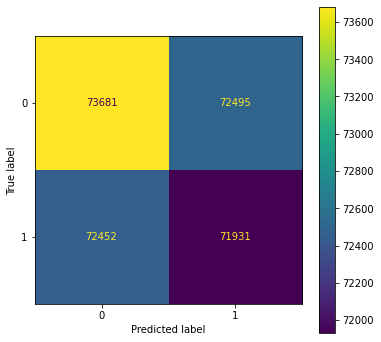

--- ROC AUC ---------------------------------------------------------------------------------------- 



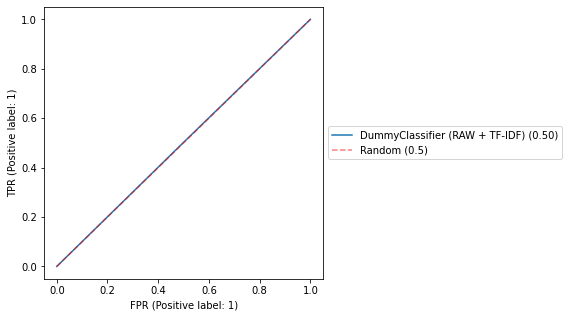

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



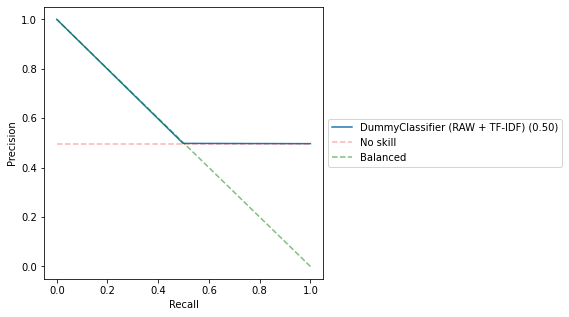

In [11]:
get_scores(model_name, **grd_dummy, register=True, X_ref=X_test, y_ref=y_test)

In [12]:
del grd_dummy

## 2.2 Essayons un algorithme linéaire - Logistic Regression <a class="anchor" id="CLF_logreg"></a> [⇪](#menu)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from scipy.stats import uniform, loguniform

In [15]:
max_lr_iter = 3000
param_grid = [
    {
        'random_state':[random_seed],
        'max_iter':[max_lr_iter],
        'solver' : ['lbfgs'],
        'penalty' : ['l2'], # none
        'C' : loguniform(1e-5, 1e2),
    },
    {
        'random_state':[random_seed],
        'max_iter':[max_lr_iter],
        'solver' : ['liblinear'],
        'penalty' : ['l1', 'l2'], # none
        'C' : loguniform(1e-5, 1e2),
    },
    {
        'random_state':[random_seed],
        'max_iter':[max_lr_iter],
        'solver' : ['saga'],
        'penalty' : ['elasticnet'], # none
        'C' : loguniform(1e-5, 1e2),
        'l1_ratio' : uniform(0,1)
    },
]

In [16]:
model_name = "LogisticRegression (RAW + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.8159
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.8177
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.8158
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.8155
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.8163

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.8162 (std:0.0008)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (RAW + TF-IDF) --------------------------------------------------------------

             ROC_AUC : 0.8783
                  F1 : 0.7981
            ACCURACY : 0.7980
           PRECISION : 0.7926
              RECALL : 0.8037
   AVERAGE_PRECISION : 0.8786

       TRAINING-TIME : 1104.5527
      INFERENCE-TIME : 0.0711

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.80      0.79      0.80    146176
Prediction = 1       0.79      0.80      0.80    144383

      accuracy                           0.80    290559
     macro avg     

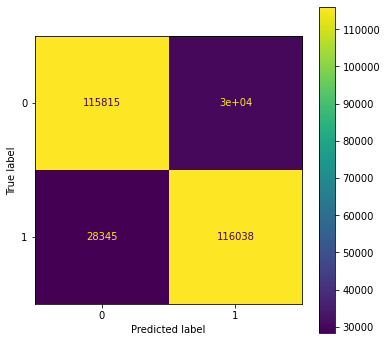

--- ROC AUC ---------------------------------------------------------------------------------------- 



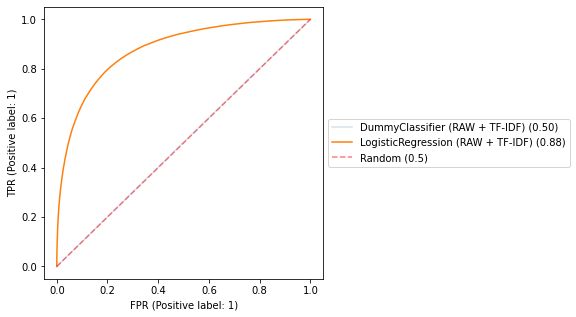

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



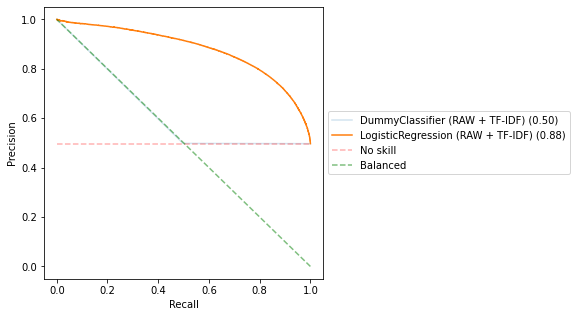

In [17]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

---
---
# 3. Recherche du `pré-traitement` le plus adapté <a class="anchor" id="PREPROCESS"></a> [⇪](#menu)

---
## 3.1 RAW / Aucun pré-processing <a class="anchor" id="PREPROCESS_raw"></a> [⇪](#menu)

### Nous avons déjà calculé ce modèle, donc nous n'allons pas le refaire, mais nous pouvons afficher les résultats une seconde fois

/home/valkea/Dev/OpenClassrooms/Projets_AI/P7/venvP7/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (RAW + TF-IDF) --------------------------------------------------------------

             ROC_AUC : 0.8783
                  F1 : 0.7981
            ACCURACY : 0.7980
           PRECISION : 0.7926
              RECALL : 0.8037
   AVERAGE_PRECISION : 0.8786

       TRAINING-TIME : 1104.5527
      INFERENCE-TIME : 0.0317

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.80      0.79      0.80    146176
Prediction = 1       0.79      0.80      0.80    144383

      accuracy                           0.80    290559
     macro avg     

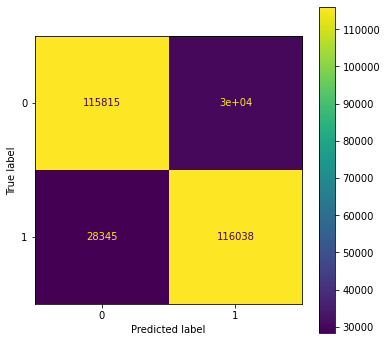

--- ROC AUC ---------------------------------------------------------------------------------------- 



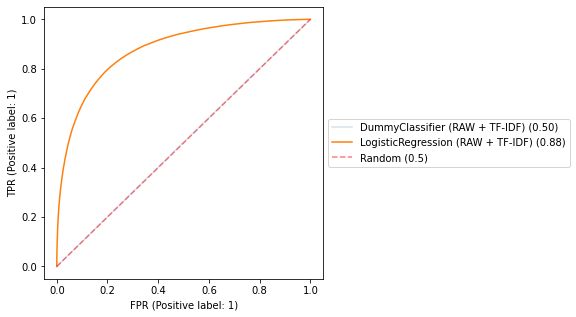

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



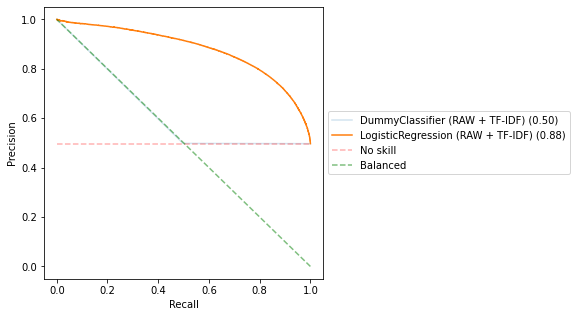

In [18]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

---
## 3.2 Preprocessing 01 / Twitter-Preprocessor <a class="anchor" id="PREPROCESS_01"></a> [⇪](#menu)
> Pour ce jeu de données on à utiliser la librairie python [tweet-preprocessor](https://pypi.org/project/tweet-preprocessor/) afin de supprimer les MENTIONS, les URL et mots réservés *(RT, FAV, ...)*

### Séparons le jeu de données en `Train` et `Test` sets

In [19]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_01, 'text_clean', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    You too are fake.. :X ... Disguising your link...
37615                  my boss is still mad from me i guess
Name: text_clean, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø¹' 'ø¹ø' 'ø¹ù']
Sets shapes >> X_train: (1162232, 45568), X_test: (290559, 45568)


### Appliquons la Logistic Regression avec ce jeu de données

In [20]:
model_name = "LogisticRegression (PREPROCESS01 + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.8161
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.8177
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.8161
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.8157
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.8164

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.8164 (std:0.0007)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS01 + TF-IDF) -----------------------------------------------------

             ROC_AUC : 0.8769
                  F1 : 0.7968
            ACCURACY : 0.7965
           PRECISION : 0.7907
              RECALL : 0.8030
   AVERAGE_PRECISION : 0.8775

       TRAINING-TIME : 1021.3067
      INFERENCE-TIME : 0.0510

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.80      0.79      0.80    146176
Prediction = 1       0.79      0.80      0.80    144383

      accuracy                           0.80    290559
     macro avg     

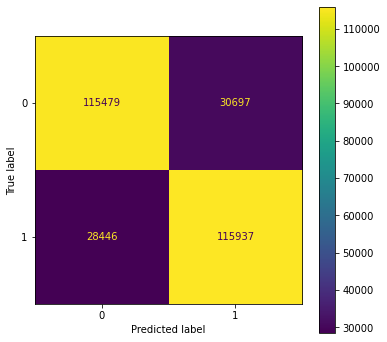

--- ROC AUC ---------------------------------------------------------------------------------------- 



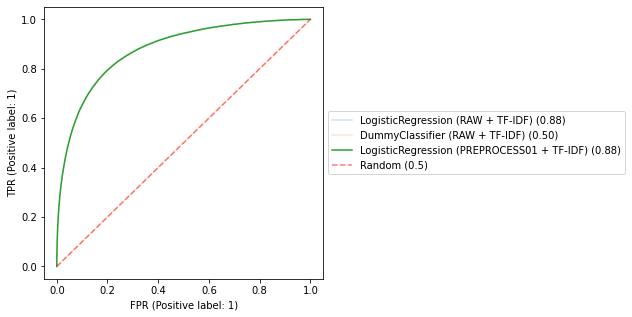

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



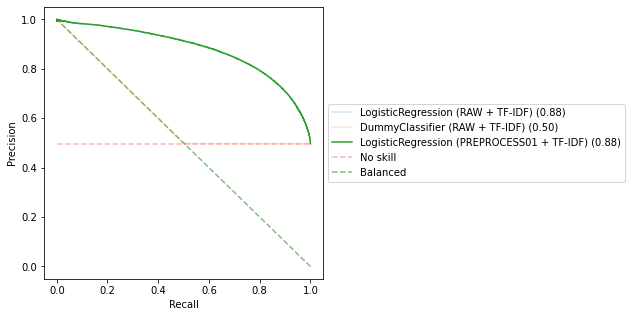

In [21]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

---
## 3.3 Preprocessing 02 / SpaCy Tokenization <a class="anchor" id="PREPROCESS_02"></a> [⇪](#menu)
> Pour ce jeu de données on à utilisé le jeu de données précèdent (data_preprocess_01) que l'on a Tokenisé en utilisant SpaCy. On en a profité pour supprimer les espaces en début et fin de ligne et pour retirer les majuscules *(était-ce une bonne idée ?)*

### Séparons le jeu de données en `Train` et `Test` sets

In [22]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_02, 'tokens', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    you too are fake .. :x ... disguising your lin...
37615                  my boss is still mad from me i guess
Name: tokens, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø¹' 'ø¹ø' 'ø¹ù']
Sets shapes >> X_train: (1162232, 45441), X_test: (290559, 45441)


### Appliquons la Logistic Regression avec ce jeu de données

In [23]:
model_name = "LogisticRegression (PREPROCESS02 + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.8165
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.8181
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.8165
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.8162
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.8169

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.8168 (std:0.0007)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS02 + TF-IDF) -----------------------------------------------------

             ROC_AUC : 0.8763
                  F1 : 0.7966
            ACCURACY : 0.7961
           PRECISION : 0.7898
              RECALL : 0.8035
   AVERAGE_PRECISION : 0.8764

       TRAINING-TIME : 970.8681
      INFERENCE-TIME : 0.0744

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.80      0.79      0.80    146176
Prediction = 1       0.79      0.80      0.80    144383

      accuracy                           0.80    290559
     macro avg      

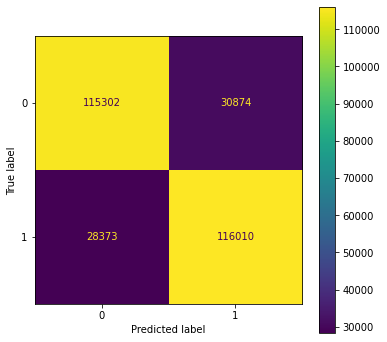

--- ROC AUC ---------------------------------------------------------------------------------------- 



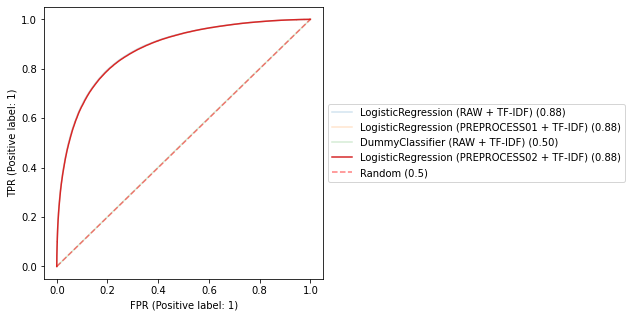

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



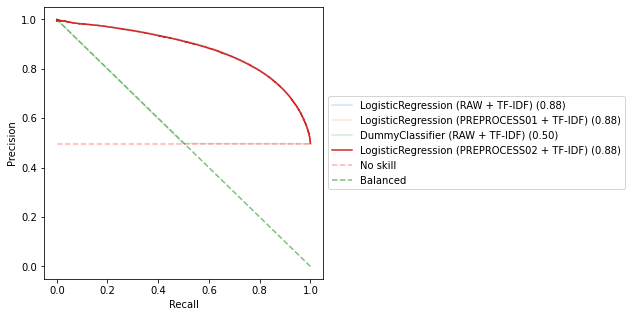

In [24]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

---
## 3.4 Preprocessing 03 / SpaCy Filtering <a class="anchor" id="PREPROCESS_03"></a> [⇪](#menu)
> Pour ce jeu de données on à utilisé le jeu de données précèdent (data_preprocess_02) que l'on a Filtré en utilisant les pos tags des tokens SpaCy collecté précèdement.

### Séparons le jeu de données en `Train` et `Test` sets

In [25]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_03, 'tokens_filtered_advanced', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    fake disguising links
37615            boss mad guess
Name: tokens_filtered_advanced, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø³ù' 'ø¹' 'ø¹ù']
Sets shapes >> X_train: (1162232, 38193), X_test: (290559, 38193)


### Appliquons la Logistic Regression avec ce jeu de données

In [26]:
model_name = "LogisticRegression (PREPROCESS03 + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.7905
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.7915
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.7909
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.7905
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.7907

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.7908 (std:0.0005)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS03 + TF-IDF) -----------------------------------------------------

             ROC_AUC : 0.8475
                  F1 : 0.7721
            ACCURACY : 0.7685
           PRECISION : 0.7556
              RECALL : 0.7893
   AVERAGE_PRECISION : 0.8407

       TRAINING-TIME : 629.4334
      INFERENCE-TIME : 0.0768

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.78      0.75      0.76    146176
Prediction = 1       0.76      0.79      0.77    144383

      accuracy                           0.77    290559
     macro avg      

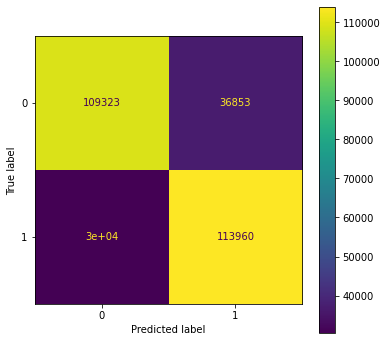

--- ROC AUC ---------------------------------------------------------------------------------------- 



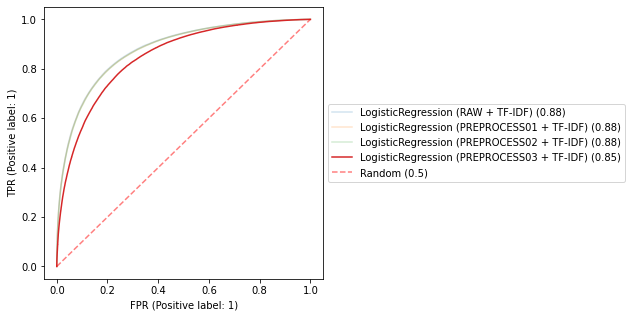

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



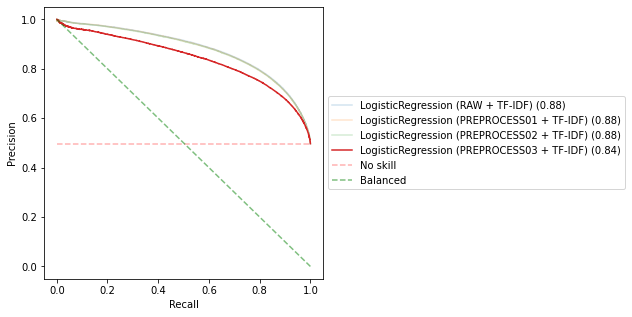

In [27]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

## Testons la même chose avec le jeu de données qui a été filtré avec des règles plus simples

### Séparons le jeu de données en `Train` et `Test` sets

In [28]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_03_simple, 'tokens_filtered_simple', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    fake disguising links
37615            boss mad guess
Name: tokens_filtered_simple, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø³ù' 'ø¹' 'ø¹ù']
Sets shapes >> X_train: (1162232, 38318), X_test: (290559, 38318)


### Appliquons la Logistic Regression avec ce jeu de données

In [29]:
model_name = "LogisticRegression (PREPROCESS03_simple + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.7916
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.7925
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.7918
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.7916
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.7919

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.7919 (std:0.0005)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS03_simple + TF-IDF) ----------------------------------------------

             ROC_AUC : 0.8486
                  F1 : 0.7734
            ACCURACY : 0.7698
           PRECISION : 0.7568
              RECALL : 0.7908
   AVERAGE_PRECISION : 0.8418

       TRAINING-TIME : 645.6028
      INFERENCE-TIME : 0.0627

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.78      0.75      0.77    146176
Prediction = 1       0.76      0.79      0.77    144383

      accuracy                           0.77    290559
     macro avg      

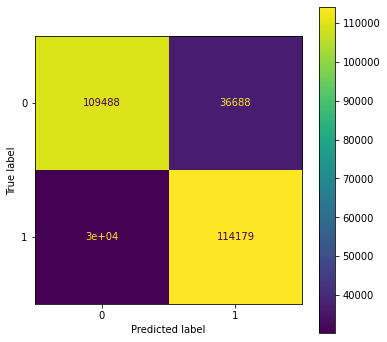

--- ROC AUC ---------------------------------------------------------------------------------------- 



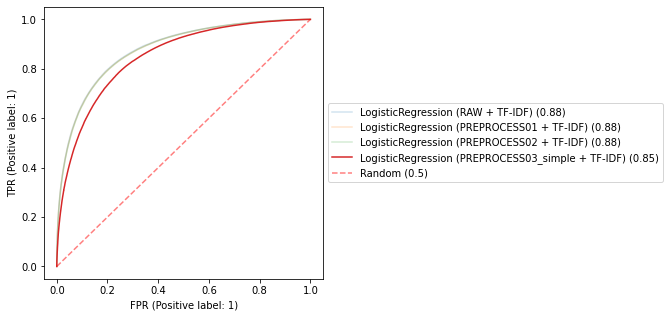

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



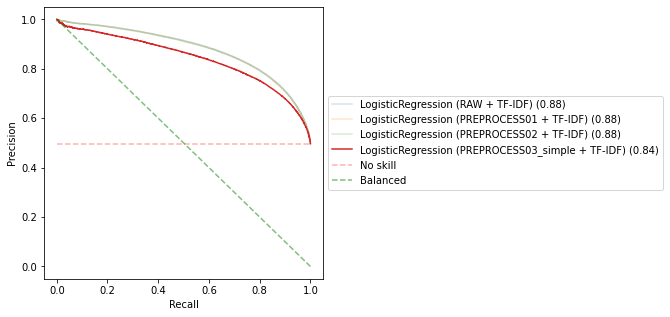

In [30]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

---
## 3.5 Preprocessing 04 / SpaCy Lemmatization <a class="anchor" id="PREPROCESS_04"></a> [⇪](#menu)
> Pour ce jeu de données on à utilisé le jeu de données précèdent (data_preprocess_03) que l'on a Lemmatisé en utilisant SpaCy.

### Séparons le jeu de données en `Train` et `Test` sets

In [31]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_04, 'lemmas_filtered_advanced', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    fake disguise link
37615         boss mad guess
Name: lemmas_filtered_advanced, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø³ù' 'ø¹' 'ø¹ù']
Sets shapes >> X_train: (1162232, 31734), X_test: (290559, 31734)


### Appliquons la Logistic Regression avec ce jeu de données

In [32]:
model_name = "LogisticRegression (PREPROCESS04 + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.7886
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.7896
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.7888
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.7885
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.7889

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.7889 (std:0.0005)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS04 + TF-IDF) -----------------------------------------------------

             ROC_AUC : 0.8415
                  F1 : 0.7658
            ACCURACY : 0.7622
           PRECISION : 0.7499
              RECALL : 0.7825
   AVERAGE_PRECISION : 0.8349

       TRAINING-TIME : 612.6315
      INFERENCE-TIME : 0.0645

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.78      0.74      0.76    146176
Prediction = 1       0.75      0.78      0.77    144383

      accuracy                           0.76    290559
     macro avg      

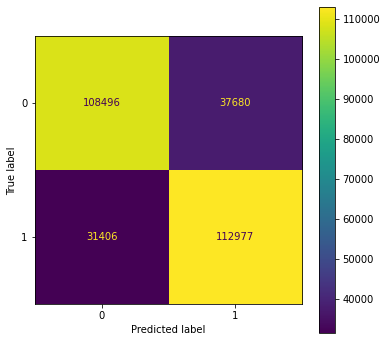

--- ROC AUC ---------------------------------------------------------------------------------------- 



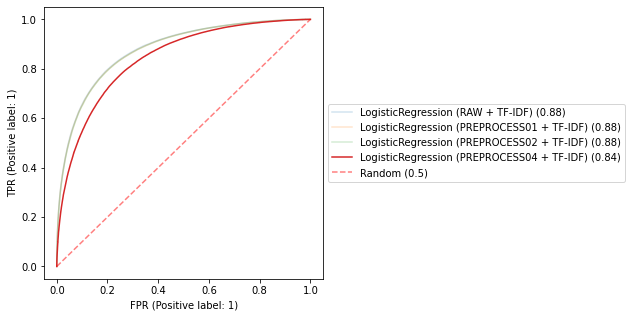

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



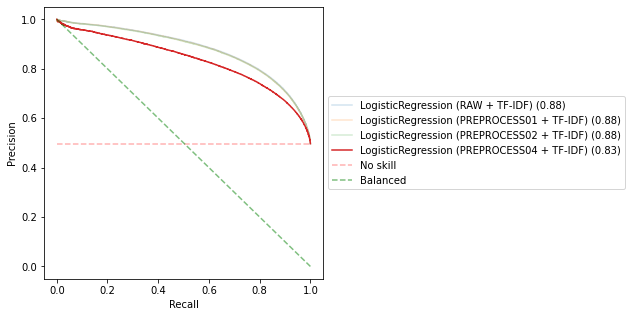

In [33]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

## Testons la même chose avec le jeu de données qui a été filtré avec des règles plus simples

### Séparons le jeu de données en `Train` et `Test` sets

In [34]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_04_simple, 'lemmas_filtered_simple', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    fake disguise link
37615         boss mad guess
Name: lemmas_filtered_simple, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø³ù' 'ø¹' 'ø¹ù']
Sets shapes >> X_train: (1162232, 31885), X_test: (290559, 31885)


### Appliquons la Logistic Regression avec ce jeu de données

In [35]:
model_name = "LogisticRegression (PREPROCESS04_simple + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.7899
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.7907
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.7899
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.7898
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.7902

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.7901 (std:0.0004)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS04_simple + TF-IDF) ----------------------------------------------

             ROC_AUC : 0.8427
                  F1 : 0.7670
            ACCURACY : 0.7634
           PRECISION : 0.7510
              RECALL : 0.7838
   AVERAGE_PRECISION : 0.8362

       TRAINING-TIME : 616.9129
      INFERENCE-TIME : 0.0542

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.78      0.74      0.76    146176
Prediction = 1       0.75      0.78      0.77    144383

      accuracy                           0.76    290559
     macro avg      

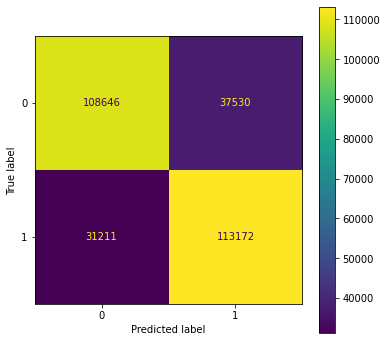

--- ROC AUC ---------------------------------------------------------------------------------------- 



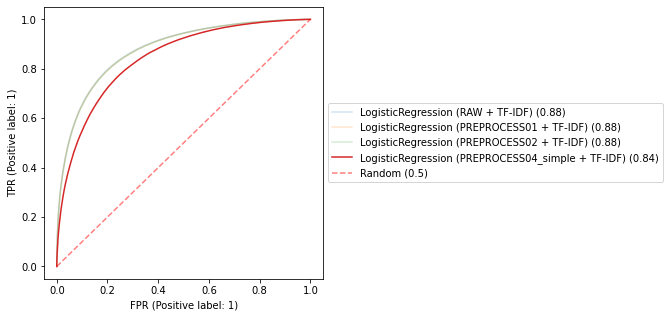

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



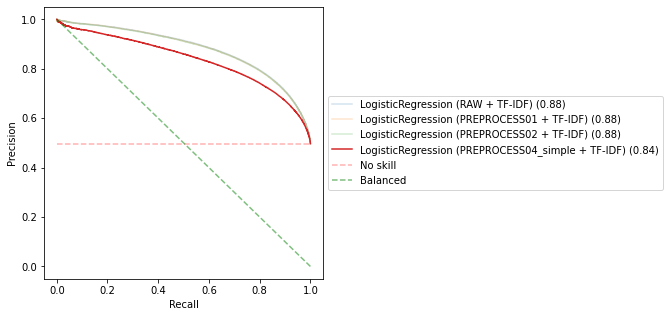

In [36]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

## Testons la même chose avec le jeu de données qui n'a PAS été filtré

### Séparons le jeu de données en `Train` et `Test` sets

In [41]:
X_train, X_test, y_train, y_test, tfidf_vectorizer_train = preprocess_data(data_preprocess_04_nofilter, 'lemmas_not_filtered', test_size=0.2)

DataFrames shapes >> df_train: (1162232,), df_test:(290559,), y_train:(1162232,), y_test:(290559,)
Preview:
317722    you too be fake .. :x ... disguise your link t...
37615                   my boss be still mad from I I guess
Name: lemmas_not_filtered, dtype: object
TF-IDF features: ['00' '000' '000th' ... 'ø¹' 'ø¹ø' 'ø¹ù']
Sets shapes >> X_train: (1162232, 38991), X_test: (290559, 38991)


### Appliquons la Logistic Regression avec ce jeu de données

In [42]:
model_name = "LogisticRegression (PREPROCESS04_nofilter + TF-IDF)"
max_lr_iter = 3000

grd_log = fit_model(
    LogisticRegression(), 
    param_grid=param_grid,  
    cv = skfold,
    X_ref = X_train,
    y_ref = y_train,
)

----------------------------------------------------------------------------------------------------
FOLD-1   TEST scores | ROC_AUC: 0.8163
----------------------------------------------------------------------------------------------------
FOLD-2   TEST scores | ROC_AUC: 0.8179
----------------------------------------------------------------------------------------------------
FOLD-3   TEST scores | ROC_AUC: 0.8162
----------------------------------------------------------------------------------------------------
FOLD-4   TEST scores | ROC_AUC: 0.8156
----------------------------------------------------------------------------------------------------
FOLD-5   TEST scores | ROC_AUC: 0.8167

------------------------------------ TEST-CV-SPLIT MEAN SCORES -------------------------------------

- ROC_AUC: 0.8166 (std:0.0008)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
          These information are based on the best estimator of the above cross-validation           
----------------------------------------------------------------------------------------------------

--- LogisticRegression (PREPROCESS04_nofilter + TF-IDF) --------------------------------------------

             ROC_AUC : 0.8717
                  F1 : 0.7916
            ACCURACY : 0.7913
           PRECISION : 0.7855
              RECALL : 0.7977
   AVERAGE_PRECISION : 0.8722

       TRAINING-TIME : 984.4706
      INFERENCE-TIME : 0.0945

--- Classification Report -------------------------------------------------------------------------- 

                 precision    recall  f1-score   support

Prediction = 0       0.80      0.78      0.79    146176
Prediction = 1       0.79      0.80      0.79    144383

      accuracy                           0.79    290559
     macro avg      

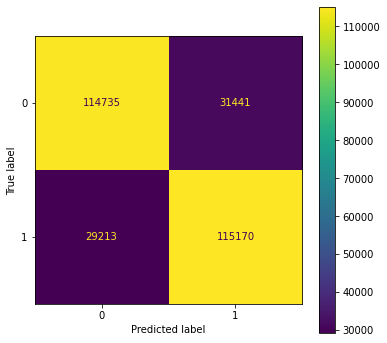

--- ROC AUC ---------------------------------------------------------------------------------------- 



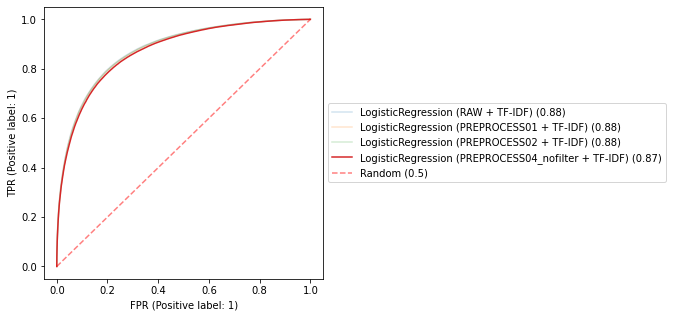

--- PRECISION RECALL AUC --------------------------------------------------------------------------- 



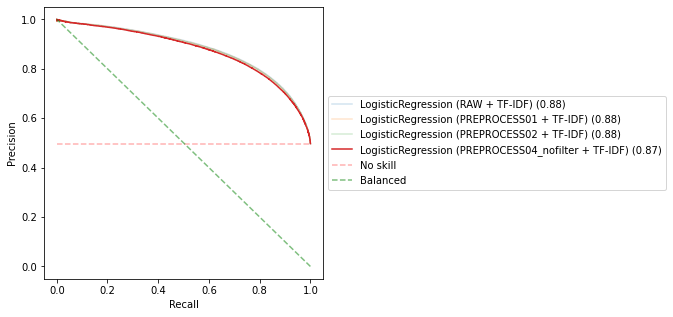

In [43]:
get_scores(model_name, **grd_log, register=True, X_ref=X_test, y_ref=y_test)

---
## 3.6 Comparaison des `scores` <a class="anchor" id="PREPROCESS_scores"></a> [⇪](#menu)

>#### Les scores ci-dessous ont été obtenus avec divers pré-traitements initiaux
> mais la phase final de pré-traitement à dans tous les cas utilisé **TF-IDF** comme moyen de rendre compatible les textes avec le DummyClassifier et la LogisticRegression.

In [44]:
from classification_utils import scores_df

In [45]:
scores_df

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,TP,TN,FP,FN,Training time,Inference time
0,DummyClassifier (RAW + TF-IDF),None,"{'random_state': [0], 'strategy': ['stratified']}",0.501126,0.497479,0.498122,0.501144,0.498047,0.498196,71931,73681,72495,72452,2.180013,0.026919
1,LogisticRegression (RAW + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.878261,0.878619,0.798110,0.797955,0.792615,0.803682,116038,115815,30361,28345,1104.552671,0.031679
2,LogisticRegression (PREPROCESS01 + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.876879,0.877461,0.796771,0.796451,0.790656,0.802982,115937,115479,30697,28446,1021.306742,0.051024
3,LogisticRegression (PREPROCESS02 + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.876328,0.876399,0.796589,0.796093,0.789807,0.803488,116010,115302,30874,28373,970.868110,0.074385
4,LogisticRegression (PREPROCESS03 + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.847550,0.840666,0.772097,0.768460,0.755638,0.789290,113960,109323,36853,30423,629.433361,0.076786
5,LogisticRegression (PREPROCESS03_simple + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.848608,0.841821,0.773439,0.769782,0.756819,0.790806,114179,109488,36688,30204,645.602822,0.062691
6,LogisticRegression (PREPROCESS04 + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.841475,0.834905,0.765842,0.762231,0.749895,0.782481,112977,108496,37680,31406,612.631544,0.064539
7,LogisticRegression (PREPROCESS04_simple + TF-IDF),None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.842710,0.836222,0.767047,0.763418,0.750965,0.783832,113172,108646,37530,31211,616.912871,0.054205
8,LogisticRegression (PREPROCESS04_nofilter + TF...,None,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.871692,0.872167,0.791563,0.791251,0.785548,0.797670,115170,114735,31441,29213,984.470571,0.094511


### Conclusion
> Le meilleur pré-traitement avec la LogisticRegression semble être `LogisticRegression (RAW + TF-IDF)` ou `LogisticRegression (PREPROCESS01 + TF-IDF)`

### Légende
>
> `RAW` 
> - aucun pré-traitement

> `PREPROCESS01`
> - nettoyage avec Twitter-preprocessor

> `PREPROCESS02`
> - nettoyage avec Twitter-preprocessor
> - Tokenization avec SpaCy

> `PREPROCESS03` 
> - nettoyage avec Twitter-preprocessor
> - Tokenization avec SpaCy
> - Filtrage **avancé** des tokens avec SpaCy

> `PREPROCESS03_simple` 
> - nettoyage avec Twitter-preprocessor
> - Tokenization avec SpaCy
> - Filtrage **simple** des tokens avec SpaCy

> `PREPROCESS04` 
> - nettoyage avec Twitter-preprocessor
> - Tokenization avec SpaCy
> - Filtrage **avancé** des tokens avec SpaCy
> - Lemmatization avec SpaCy

> `PREPROCESS04_simple` 
> - nettoyage avec Twitter-preprocessor
> - Tokenization avec SpaCy
> - Filtrage **simple** des tokens avec SpaCy
> - Lemmatization avec SpaCy

> `PREPROCESS04_nofilter` 
> - nettoyage avec Twitter-preprocessor
> - Tokenization avec SpaCy
> - AUCUN Filtrage
> - Lemmatization avec SpaCy